<a href="https://colab.research.google.com/github/24ta/2021dataSeminar/blob/master/06/06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第06回データ分析勉強会（2020/01/28）
## データの見直しと予測 ~ kickstart project 3回目~
### 使用データ：[Kickstarter Projects](https://www.kaggle.com/kemical/kickstarter-projects) <br>
参考URL：<br>
[テービーテックのデータサイエンス "Kaggleに挑戦しよう！　～コード説明１～"](https://ds-blog.tbtech.co.jp/entry/2019/04/19/Kaggle%E3%81%AB%E6%8C%91%E6%88%A6%E3%81%97%E3%82%88%E3%81%86%EF%BC%81_%EF%BD%9E%E3%82%B3%E3%83%BC%E3%83%89%E8%AA%AC%E6%98%8E%EF%BC%91%EF%BD%9E)<br>
[テービーテックのデータサイエンス "Kaggleに挑戦しよう！　～コード説明２～"](https://ds-blog.tbtech.co.jp/entry/2019/04/27/Kaggle%E3%81%AB%E6%8C%91%E6%88%A6%E3%81%97%E3%82%88%E3%81%86%EF%BC%81_%EF%BD%9E%E3%82%B3%E3%83%BC%E3%83%89%E8%AA%AC%E6%98%8E%EF%BC%92%EF%BD%9E)<br>
[テービーテックのデータサイエンス "Kaggleに挑戦しよう！　〜コード修正〜"](https://ds-blog.tbtech.co.jp/entry/2019/05/13/Kaggle%E3%81%AB%E6%8C%91%E6%88%A6%E3%81%97%E3%82%88%E3%81%86%EF%BC%81_%EF%BD%9E%E3%82%B3%E3%83%BC%E3%83%89%E4%BF%AE%E6%AD%A3%EF%BD%9E)<br>
[テービーテックのデータサイエンス "Kaggleに挑戦しよう！　〜隠されしデータの全貌①〜"](https://ds-blog.tbtech.co.jp/entry/2019/06/05/Kaggle%E3%81%AB%E6%8C%91%E6%88%A6%E3%81%97%E3%82%88%E3%81%86%EF%BC%81_%EF%BD%9E%E9%9A%A0%E3%81%95%E3%82%8C%E3%81%97%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E5%85%A8%E8%B2%8C%E2%91%A0%EF%BD%9E)<br>
[テービーテックのデータサイエンス "Kaggleに挑戦しよう！　〜隠されしデータの全貌②〜"](https://ds-blog.tbtech.co.jp/entry/2019/06/12/Kaggle%E3%81%AB%E6%8C%91%E6%88%A6%E3%81%97%E3%82%88%E3%81%86%EF%BC%81_%EF%BD%9E%E9%9A%A0%E3%81%95%E3%82%8C%E3%81%97%E3%83%87%E3%83%BC%E3%82%BF%E3%81%AE%E5%85%A8%E8%B2%8C%E2%91%A1%EF%BD%9E)

# import libraries

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline  #matplotlibのグラフを表示する
import seaborn as sns #matplotlibより美しいグラフの描画
from sklearn.preprocessing import StandardScaler #preprocessing：前処理  StandardScaler：標準化
from sklearn.model_selection import train_test_split #データを訓練データとテストデータに分割する
from sklearn.linear_model import SGDClassifier #クラス分類をする
from sklearn.metrics import log_loss, accuracy_score, precision_recall_fscore_support, confusion_matrix 
#log_loss：対数尤度 ,accuracy_score：正答率 ,precision_recall_fscore_support：適合率,再現率,F1値 ,confusion_matrix：クロス集計表
from sklearn.metrics import mean_absolute_error #平均絶対誤差
import datetime as dt #日時を扱う
import requests
from io import StringIO

### Read Data

In [87]:
url = 'https://raw.githubusercontent.com/24ta/2021dataSeminar/master/06/data2.csv'
res = requests.get(url).content
df = pd.read_csv(StringIO(res.decode('utf-8')), header=0, index_col=0)

In [88]:
df

,goal,pledged,state,backers,usdpledged,period,Art,Comics,Crafts,Dance,...,DKK,EUR,GBP,HKD,MXN,NOK,NZD,SEK,SGD,USD
0,1000.0,0.000000,0,0.0,0.000000,58.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,45000.0,311.004083,0,3.0,8.744170,45.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,5000.0,1.413655,0,1.0,0.039746,30.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,50000.0,74040.176517,1,224.0,2081.708742,35.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1000.0,1703.454180,1,16.0,47.894206,20.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281087,1700.0,35.341373,0,1.0,0.993656,29.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
281088,1500.0,219.116513,0,5.0,6.160665,27.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
281089,15000.0,28.273098,0,1.0,0.794925,45.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
281090,15000.0,282.730984,0,6.0,7.949246,30.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [89]:
# ホールドアウト
y = df['state'].values
X = df.drop('state', axis=1).values
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

# 標準化
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

# 予測
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True)
#loss：損失関数　max_iter：学習の最大回数　fit_intercept：切片を求める
clf.fit(X_train, y_train)
y_prd_train = clf.predict(X_train)
print('対数尤度 = {:.3f}'.format(- log_loss(y_train, y_prd_train))) # '対数尤度 を表示
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy_score(y_train, y_prd_train))) # 正答率を表示
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_prd_train) #適合率・再現率・F1値を計算
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0])) # 適合率を表示
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0])) # 再現率を表示
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0])) #F1値を表示

対数尤度 = -3.020
正答率（Accuracy） = 91.257%
適合率（Precision） = 90.052%
再現率（Recall） = 95.980%
F1値（F1-score） = 92.922%


### 問題1：なぜこんなに良い数値が出たのか調べてみましょう
ヒント：特徴量の重要度を可視化してみるといいですね！
特徴量の重要度：clf.coef_ (clf.coef_の0行目)
特徴量の名前：df.drop('state',axis=1).columns

### Leakage(情報漏れ)

* pledged：集まった資金
* usd pledged： 集まった資金の米ドル換算
* backer：集まった支援者
はプロジェクト立ち上げ時には知り得ない情報

今後この予測モデルを使って予測する時、新しいデータにはこの3つの情報を取得できないので詰んでしまう

なのでこの3つの変数を消しましょう

In [81]:
df.drop(columns=['pledged', 'usdpledged', 'backers'], inplace=True)
# ホールドアウト
y = df['state'].values
X = df.drop('state', axis=1).values
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1234)

# 標準化
stdsc = StandardScaler()
X_train = stdsc.fit_transform(X_train)
X_test = stdsc.transform(X_test)

# 予測
clf = SGDClassifier(loss='log', penalty='none', max_iter=10000, fit_intercept=True)
#loss：損失関数　max_iter：学習の最大回数　fit_intercept：切片を求める
clf.fit(X_train, y_train)
y_prd_train = clf.predict(X_train)
print('対数尤度 = {:.3f}'.format(- log_loss(y_train, y_prd_train))) # '対数尤度 を表示
print('正答率（Accuracy） = {:.3f}%'.format(100 * accuracy_score(y_train, y_prd_train))) # 正答率を表示
precision, recall, f1_score, _ = precision_recall_fscore_support(y_train, y_prd_train) #適合率・再現率・F1値を計算
print('適合率（Precision） = {:.3f}%'.format(100 * precision[0])) # 適合率を表示
print('再現率（Recall） = {:.3f}%'.format(100 * recall[0])) # 再現率を表示
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0])) #F1値を表示

対数尤度 = -12.180
正答率（Accuracy） = 64.737%
適合率（Precision） = 68.388%
再現率（Recall） = 76.290%
F1値（F1-score） = 72.123%


精度が下がりましたがこれでリークが解消されました。

### 予測精度を上げる
ここまでが予測のベースラインとして、これから予測精度を上げるために試行錯誤していきます。

まず真っ先に考えられるのが
* 特徴量選択
* トレーニングデータを増やす
* アンサンブル学習をする
などです。

### 特徴量選択


In [132]:
url = 'https://raw.githubusercontent.com/24ta/2021dataSeminar/master/06/data1_2.csv'
res = requests.get(url).content
df = pd.read_csv(StringIO(res.decode('utf-8')), header=0, index_col=0)

メインカテゴリの中身は ['Publishing' 'Film & Video' 'Music' 'Food' 'Crafts' 'Games' 'Design'
 'Comics' 'Fashion' 'Theater' 'Art' 'Photography' 'Technology' 'Dance'
 'Journalism']
メインカテゴリの数は 15


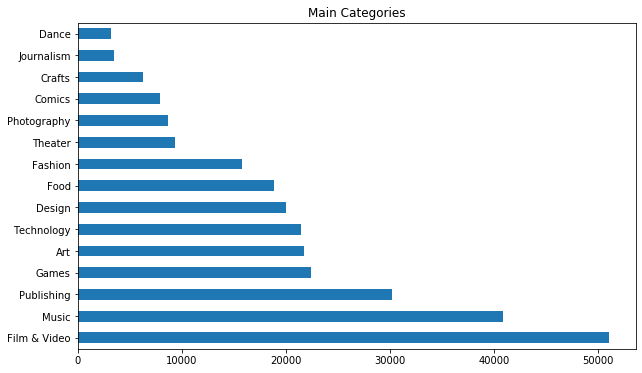

In [127]:
print('メインカテゴリの中身は', df['main_category'].unique())
print('メインカテゴリの数は', df['main_category'].nunique())

df['main_category'].value_counts().plot(kind='barh',
                                       figsize=(10,6),
                                       title='Main Categories')

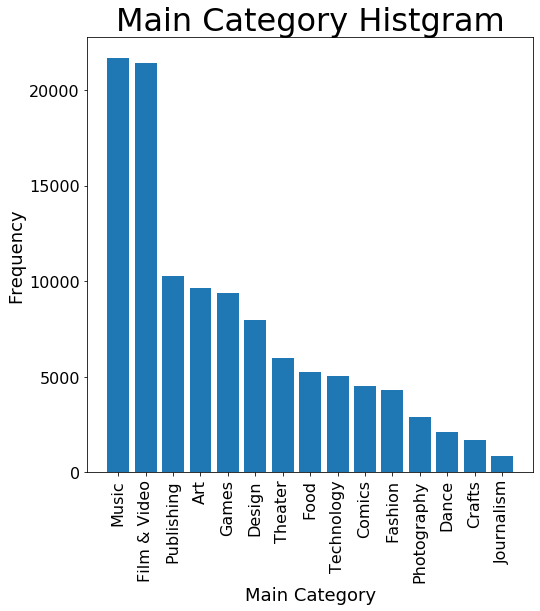

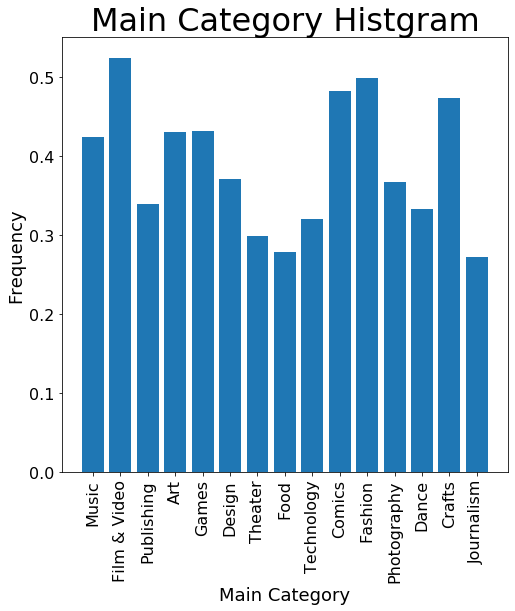

In [128]:
successful = df.loc[df.state==1]
# ax = plt.subplot()
# plt.bar(x=successful.main_category.value_counts().index,
#        height=successful.main_category.value_counts().values)
# plt.setp(ax.get_xticklabels(), rotation=60)
# plt.tight_layout()
# plt.show()

label=successful.main_category.value_counts().index
freq=successful.main_category.value_counts().values
plt.figure(figsize=[8,8])
plt.bar(label, freq)
plt.title('Main Category Histgram', size=32)
plt.xlabel('Main Category',size=18)
plt.ylabel('Frequency', size=18)
plt.xticks(rotation=90, size=16)
plt.yticks(size=16)
plt.show()

label=successful.main_category.value_counts().index
freq=successful.main_category.value_counts().values / df.main_category.value_counts().values
plt.figure(figsize=[8,8])
plt.bar(label, freq)
plt.title('Main Category Histgram', size=32)
plt.xlabel('Main Category',size=18)
plt.ylabel('Frequency', size=18)
plt.xticks(rotation=90, size=16)
plt.yticks(size=16)
plt.show()

In [129]:
from statistics import mean, stdev
suc = successful.main_category.value_counts().values
mean_suc = mean(suc)
stdev_suc = stdev(suc)
cv_suc = stdev_suc / mean_suc

print(cv_suc)

0.8476288789860709


In [130]:
print(df['country'].unique())
print(df['country'].nunique())
df['country'].value_counts()[:15].plot(kind='barh', 
                                       figsize=(8,5), 
                                       title='Top 15 countries')
label=df['country'].value_counts().index
freq=df['country'].main_category.value_counts().values
plt.figure(figsize=[8,8])
plt.bar(label, freq)
plt.title('Country Histgram', size=32)
plt.xlabel('Country',size=18)
plt.ylabel('Frequency', size=18)
plt.xticks(rotation=90, size=16)
plt.yticks(size=16)
plt.show()

KeyError: 'country'